In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [24]:
raw_csv_data = pd.read_csv("013 IndexE8.csv")

In [25]:
df_comp =  raw_csv_data.copy()

In [26]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [27]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp=df_comp.fillna(method='ffill')

In [28]:
df_comp['market_value'] = df_comp.ftse

In [29]:
df_comp.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01


In [30]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [31]:
size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size], df_comp.iloc[size:]

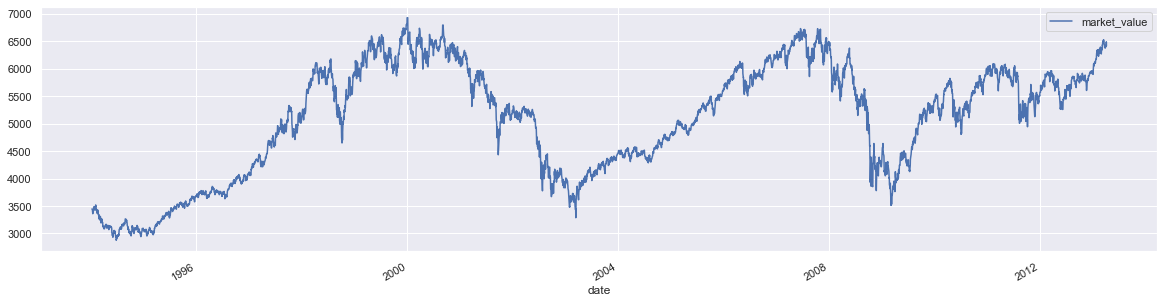

In [32]:
df.market_value.plot(figsize=(20,5))
plt.legend()
plt.show()

### Using Returns
    Retuns are the percentage change between the values for two consecutive periods
    Creating Returns
    r > 0 (Positive returns)
    r < 0 (Negative returns)
    (Pt - Pt-1 / Pt-i) * 100

In [47]:
df['returns'] = df.market_value.pct_change(1).mul(100)

<ipython-input-47-c23bd44795a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


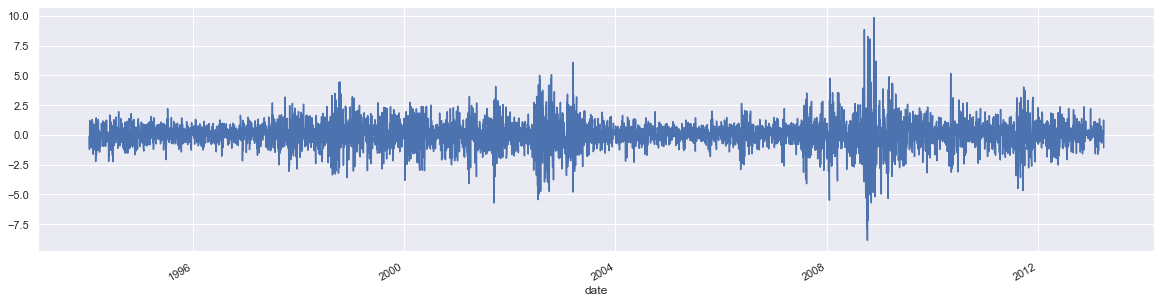

In [48]:
df['returns'].plot(figsize=(20,5))
plt.show()

In [49]:
df.isnull().sum()
df['returns']=df.fillna(value=df.returns.mean())

<ipython-input-49-407cf4ed704e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns']=df.fillna(value=df.returns.mean())


In [50]:
#Stationarity
import statsmodels.tsa.stattools as sts
sts.adfuller(df.market_value)

(-1.8519387517953811,
 0.35499712396850447,
 6,
 5008,
 {'1%': -3.431656440695734,
  '5%': -2.862117305719603,
  '10%': -2.5670773004997116},
 54790.67096898952)

In [51]:
sts.adfuller(df.returns)

(-1.8519387517953811,
 0.35499712396850447,
 6,
 5008,
 {'1%': -3.431656440695734,
  '5%': -2.862117305719603,
  '10%': -2.5670773004997116},
 54790.67096898952)

In [52]:
#Removing the First Value
df = df.iloc[1:]
sts.adfuller(df.returns)

(-1.840667682962608,
 0.36046629270987596,
 6,
 5007,
 {'1%': -3.431656701752533,
  '5%': -2.862117421053178,
  '10%': -2.5670773618962612},
 54780.67576139488)

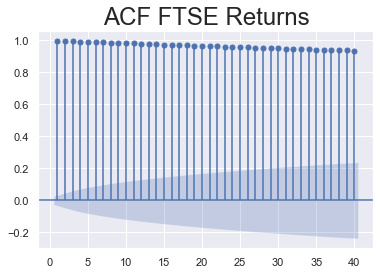

In [55]:
#ACF and PACF of Return
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.returns,lags=40, zero=False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

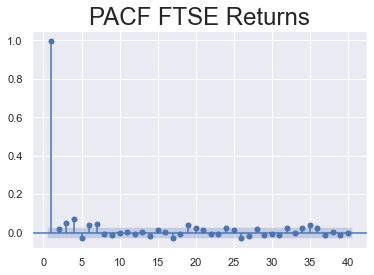

In [56]:
#PACF of Return
import statsmodels.graphics.tsaplots as sgt
sgt.plot_pacf(df.returns,lags=40, zero=False, method=('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

### AR(1) Model for Returns
    1. Define the model specification
    2. Fit the data
    3. Extract the results

In [57]:
#Libraries
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [59]:
model_ret_ar_1 = ARMA(df.returns, order=(1,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()
print(results_ret_ar_1.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5014
Model:                     ARMA(1, 0)   Log Likelihood              -27585.595
Method:                       css-mle   S.D. of innovations             59.275
Date:                Tue, 16 Mar 2021   AIC                          55177.190
Time:                        11:55:54   BIC                          55196.750
Sample:                             0   HQIC                         55184.045
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5016.1792    501.273     10.007      0.000    4033.701    5998.657
ar.L1.returns     0.9985      0.001   1297.961      0.000       0.997       1.000
                                    Root

In [66]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
#warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

In [67]:
#Higher-Lag AR Models for Returns
model_ret_ar_2 = ARMA(df.returns, order=(2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()
print(results_ret_ar_2.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5014
Model:                     ARMA(2, 0)   Log Likelihood              -27584.906
Method:                       css-mle   S.D. of innovations             59.267
Date:                Tue, 16 Mar 2021   AIC                          55177.811
Time:                        12:00:42   BIC                          55203.891
Sample:                             0   HQIC                         55186.950
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5272.0669    563.525      9.356      0.000    4167.578    6376.556
ar.L1.returns     0.9810      0.014     69.532      0.000       0.953       1.009
ar.L2.returns     0.0176      0.014     

In [68]:
#Higher-Lag AR Models for Returns
model_ret_ar_3 = ARMA(df.returns, order=(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()
print(results_ret_ar_3.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5014
Model:                     ARMA(3, 0)   Log Likelihood              -27578.777
Method:                       css-mle   S.D. of innovations             59.195
Date:                Tue, 16 Mar 2021   AIC                          55167.553
Time:                        12:02:02   BIC                          55200.153
Sample:                             0   HQIC                         55178.978
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5084.7138    532.971      9.540      0.000    4040.109    6129.319
ar.L1.returns     0.9801      0.014     69.552      0.000       0.952       1.008
ar.L2.returns    -0.0305      0.020     

In [72]:
#LLR Test
def LLR_test(mod_1,mod_2, DF=1):
    #mod_1, mod_2: modelwe want to compare
    #Degree of Freedom
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(2)
    return p

In [73]:
LLR_test(model_ret_ar_2,model_ret_ar_3)

0.0

In [75]:
LLR_test(model_ret_ar_1,model_ret_ar_3)

0.0

In [76]:
#Higher-Lag AR Models for Returns
model_ret_ar_4 = ARMA(df.returns, order=(4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()
print(results_ret_ar_4.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5014
Model:                     ARMA(4, 0)   Log Likelihood              -27565.944
Method:                       css-mle   S.D. of innovations             59.043
Date:                Tue, 16 Mar 2021   AIC                          55143.887
Time:                        12:08:50   BIC                          55183.007
Sample:                             0   HQIC                         55157.596
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5089.1199    573.082      8.880      0.000    3965.900    6212.340
ar.L1.returns     0.9766      0.014     69.427      0.000       0.949       1.004
ar.L2.returns    -0.0283      0.020     

In [77]:
LLR_test(model_ret_ar_1,model_ret_ar_4)

0.0

In [78]:
LLR_test(model_ret_ar_3,model_ret_ar_4)

0.0

In [79]:
LLR_test(model_ret_ar_2,model_ret_ar_4)

0.0

In [80]:
#Higher-Lag AR Models for Returns
model_ret_ar_5 = ARMA(df.returns, order=(5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()
print(results_ret_ar_5.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5014
Model:                     ARMA(5, 0)   Log Likelihood              -27563.838
Method:                       css-mle   S.D. of innovations             59.018
Date:                Tue, 16 Mar 2021   AIC                          55141.675
Time:                        12:11:04   BIC                          55187.315
Sample:                             0   HQIC                         55157.669
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5089.1199    556.603      9.143      0.000    3998.198    6180.042
ar.L1.returns     0.9786      0.014     69.412      0.000       0.951       1.006
ar.L2.returns    -0.0289      0.020     

In [81]:
LLR_test(model_ret_ar_1,model_ret_ar_5)

0.0

In [82]:
#Higher-Lag AR Models for Returns
model_ret_ar_6 = ARMA(df.returns, order=(6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()
print(results_ret_ar_6.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5014
Model:                     ARMA(6, 0)   Log Likelihood              -27559.890
Method:                       css-mle   S.D. of innovations             58.972
Date:                Tue, 16 Mar 2021   AIC                          55135.779
Time:                        12:12:00   BIC                          55187.939
Sample:                             0   HQIC                         55154.058
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5089.1200    579.153      8.787      0.000    3954.001    6224.239
ar.L1.returns     0.9798      0.014     69.540      0.000       0.952       1.007
ar.L2.returns    -0.0329      0.020     

In [84]:
LLR_test(model_ret_ar_5,model_ret_ar_6)

0.0

### Normalizing Values (Price and Returns)

In [85]:
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)

In [86]:
sts.adfuller(df.norm)

(-1.8406676829625466,
 0.3604662927099058,
 6,
 5007,
 {'1%': -3.431656701752533,
  '5%': -2.862117421053178,
  '10%': -2.5670773618962612},
 19532.876769094495)

In [87]:
#Normailizing Returns
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-1.8406676829625466,
 0.3604662927099058,
 6,
 5007,
 {'1%': -3.431656701752533,
  '5%': -2.862117421053178,
  '10%': -2.5670773618962612},
 19532.876769094495)

### Model Selection for Normalized Returns
    AR(1) Normailized Returns

In [91]:
model_norm_ret_ar_1 = ARMA (df.norm_ret, order=(1,0))
results = model_norm_ret_ar_1.fit()
print(results.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5014
Model:                     ARMA(1, 0)   Log Likelihood               -9844.931
Method:                       css-mle   S.D. of innovations              1.723
Date:                Tue, 16 Mar 2021   AIC                          19695.862
Time:                        12:23:25   BIC                          19715.422
Sample:                             0   HQIC                         19702.717
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            146.9428     14.469     10.156      0.000     118.585     175.301
ar.L1.norm_ret     0.9985      0.001   1301.263      0.000       0.997       1.000
                                    

In [93]:
model_norm_ret_ar_2 = ARMA (df.norm_ret, order=(2,0))
results_2 = model_norm_ret_ar_2.fit()
print(results_2.summary())
LLR_test(model_norm_ret_ar_1,model_norm_ret_ar_2)

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5014
Model:                     ARMA(2, 0)   Log Likelihood               -9844.155
Method:                       css-mle   S.D. of innovations              1.723
Date:                Tue, 16 Mar 2021   AIC                          19696.311
Time:                        12:25:38   BIC                          19722.391
Sample:                             0   HQIC                         19705.450
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            146.9398     14.730      9.976      0.000     118.070     175.810
ar.L1.norm_ret     0.9809      0.014     69.525      0.000       0.953       1.009
ar.L2.norm_ret     0.0176      0.014

0.21

In [94]:
model_norm_ret_ar_7 = ARMA (df.norm_ret, order=(7,0))
results_7 = model_norm_ret_ar_7.fit()
print(results_7.summary())
LLR_test(model_norm_ret_ar_1,model_norm_ret_ar_7)

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5014
Model:                     ARMA(7, 0)   Log Likelihood               -9814.510
Method:                       css-mle   S.D. of innovations              1.712
Date:                Tue, 16 Mar 2021   AIC                          19647.020
Time:                        12:26:57   BIC                          19705.700
Sample:                             0   HQIC                         19667.584
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            146.5086     17.558      8.344      0.000     112.095     180.922
ar.L1.norm_ret     0.9781      0.014     69.454      0.000       0.950       1.006
ar.L2.norm_ret    -0.0300      0.020

0.0

#### Analysing the Residuals

In [97]:
df['res_price'] = results_7.resid

In [98]:
#mean of residual
df.res_price.mean()

0.013156207503534656

In [99]:
#Variance
df.res_price.var()

3.3629927528526786

In [101]:
sts.adfuller(df.res_price)

(-75.63443333105336,
 0.0,
 0,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19521.12927230971)

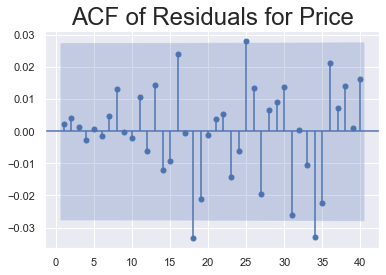

In [102]:
#ACF nad PACF of Residual
sgt.plot_acf(df.res_price, zero = False, lags=40)
plt.title("ACF of Residuals for Price", size=24)
plt.show()

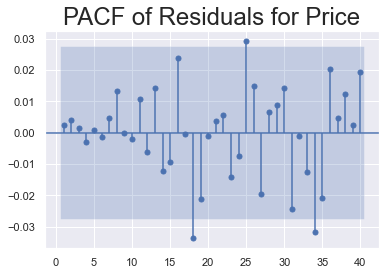

In [104]:
#ACF nad PACF of Residual
sgt.plot_pacf(df.res_price, zero = False, lags=40, method=('ols'))
plt.title("PACF of Residuals for Price", size=24)
plt.show()

In [106]:
df['res_ret'] = results_ret_ar_6.resid

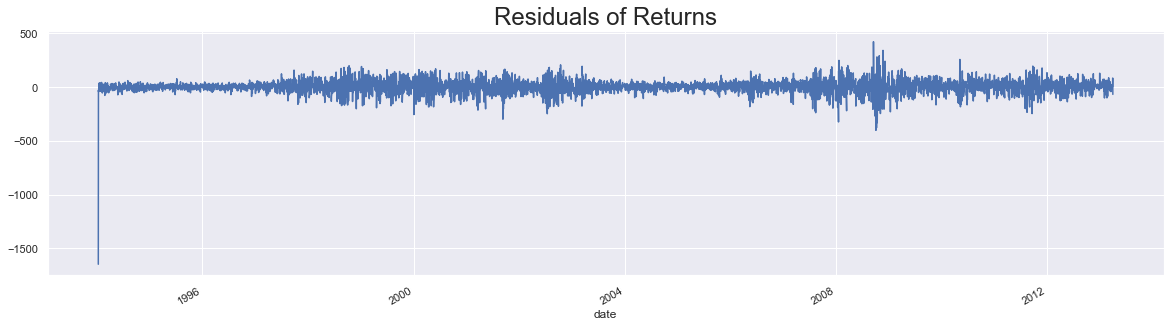

In [107]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()